In [249]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [271]:
title = 'History of the United States of America'
tit='Hist' #short title for future reference if needed
author = 'Henry Adams'
url = 'https://www.gutenberg.org/cache/epub/72667/pg72667.txt'
path = my_path

In [272]:
import os
import urllib.request  # Import the module required for making HTTP requests
# Check if the file is stored locally
filename = my_path + title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
    print("{title} file already exists".format(title=title))
    with open(filename, 'r') as f:
        raw = f.read()
else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = urllib.request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)


History of the United States of America file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [273]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters:  In perfect quiet, disturbed only by rumors of wars abroad, spring crept forward to summer, summer r
last 100 characters: . 7, 1807.  [203] Wilkinson’s Evidence, Burr’s Trial; Annals of Congress, 1807–1808, p. 515.  [204] 


In [274]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [275]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [276]:
all_tokens=word_tokenize(raw)#.lower()

In [277]:
all_tokens[60:80]

['every',
 'rivulet',
 'in',
 'the',
 'wilderness',
 ',',
 'and',
 'the',
 'President',
 'could',
 'see',
 'no',
 'limit',
 'to',
 'its',
 'future',
 'increase',
 '.',
 'In',
 '1804']

In [197]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [198]:
clean_tokens[60:80]

['included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'If',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'United',
 'States',
 'you',
 'will',
 'have',
 'to']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [278]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

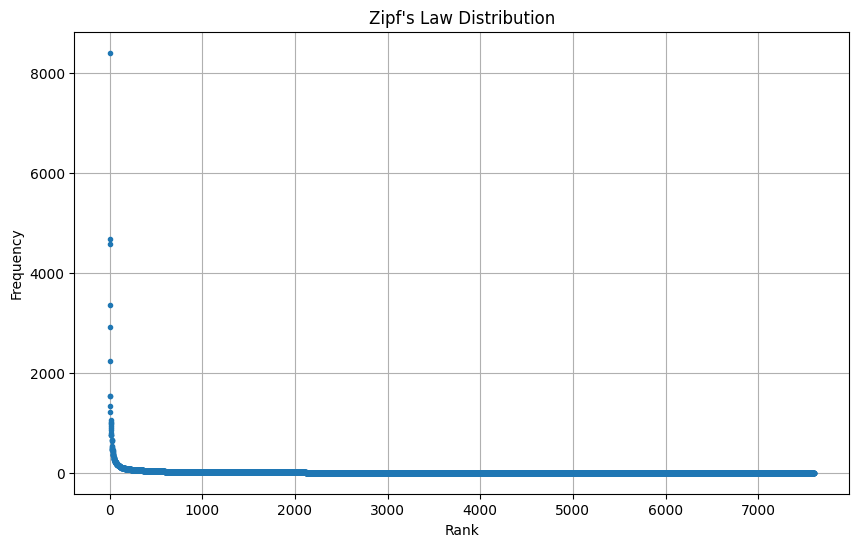

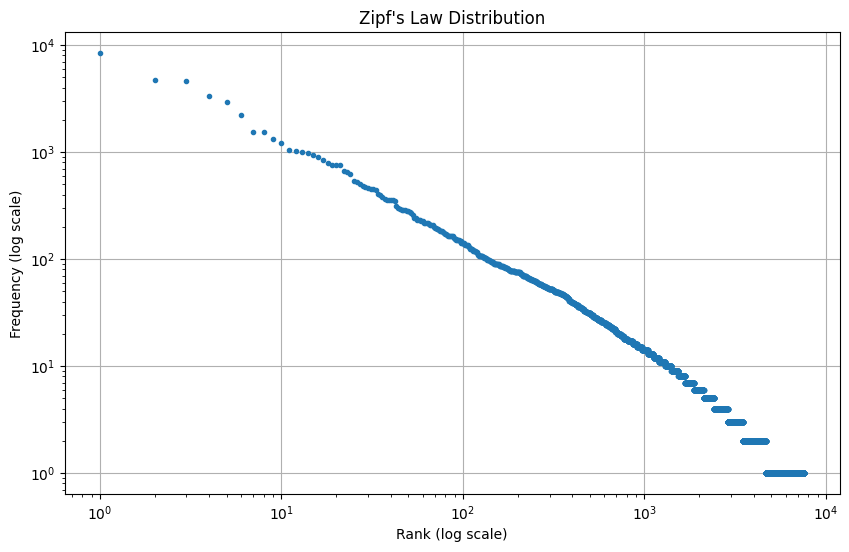

Estimated exponent 's' in Zipf's Law: 1.2818775016994919


In [279]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [280]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [281]:
stop_words=stopwords.words('english')

In [282]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [283]:
print(All_words[0:20])

['Project', 'Gutenberg', 'eBook', 'History', 'United', 'States', 'America', 'Volume', 'ebook', 'use', 'anyone', 'anywhere', 'United', 'States', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever']


In [284]:
All_fd=nltk.FreqDist(All_words)

In [285]:
All_fd

FreqDist({'wa': 1535, 'Burr': 536, 'would': 480, 'Jefferson': 457, 'could': 448, 'President': 393, 'Madison': 296, 'States': 283, 'Wilkinson': 275, 'government': 256, ...})

In [286]:
All_fd.most_common(100)

[('wa', 1535),
 ('Burr', 536),
 ('would', 480),
 ('Jefferson', 457),
 ('could', 448),
 ('President', 393),
 ('Madison', 296),
 ('States', 283),
 ('Wilkinson', 275),
 ('government', 256),
 ('New', 253),
 ('Randolph', 241),
 ('Spain', 234),
 ('United', 230),
 ('Monroe', 228),
 ('one', 221),
 ('England', 216),
 ('Spanish', 206),
 ('made', 196),
 ('might', 194),
 ('British', 191),
 ('war', 184),
 ('Congress', 181),
 ('American', 181),
 ('letter', 178),
 ('without', 164),
 ('ha', 164),
 ('day', 163),
 ('wrote', 153),
 ('time', 152),
 ('must', 151),
 ('upon', 141),
 ('Orleans', 141),
 ('said', 139),
 ('France', 139),
 ('even', 134),
 ('country', 130),
 ('State', 130),
 ('order', 130),
 ('first', 127),
 ('every', 127),
 ('Smith', 123),
 ('two', 121),
 ('last', 120),
 ('much', 117),
 ('public', 116),
 ('may', 114),
 ('part', 113),
 ('new', 113),
 ('treaty', 113),
 ('General', 111),
 ('Napoleon', 108),
 ('December', 107),
 ('point', 107),
 ('year', 106),
 ('Florida', 105),
 ('MSS', 105),
 ('mea

In [287]:
from wordcloud import WordCloud

In [288]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

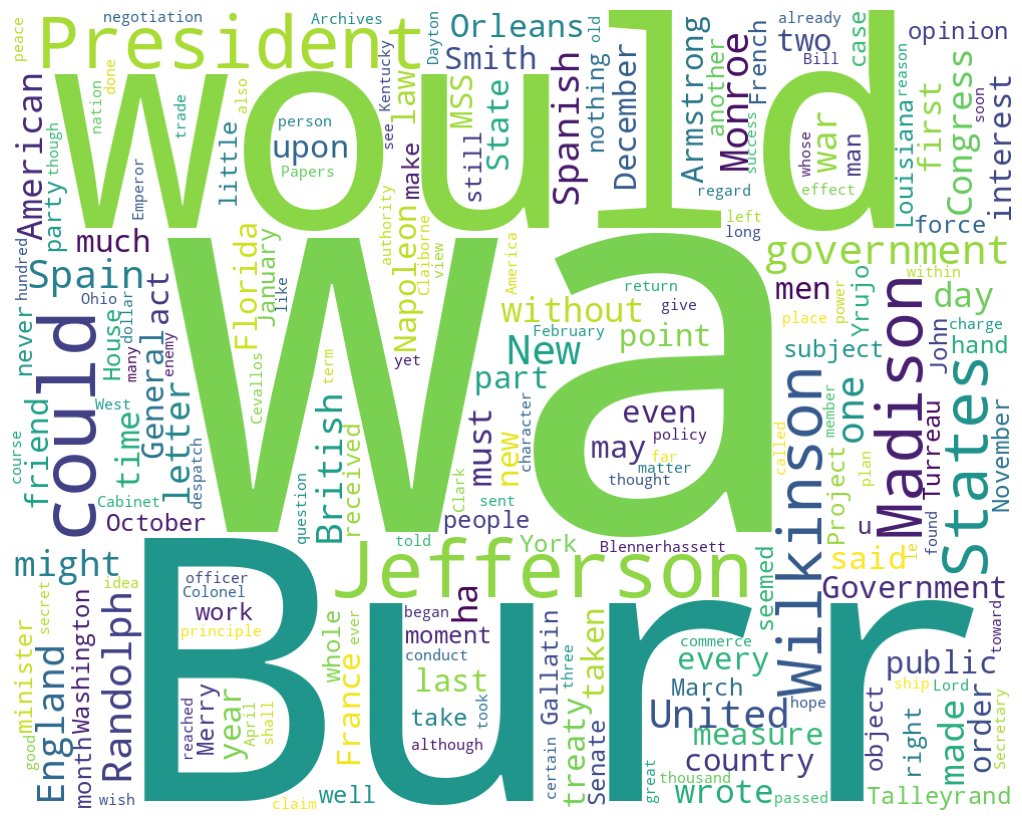

In [289]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [290]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [291]:
all_fd=nltk.FreqDist(all_words)

In [292]:
single_words=all_fd.hapaxes()

In [293]:
len(single_words)

2948

In [294]:
import random

In [295]:
random.choices(single_words,k=20)

['cross',
 'crepidam',
 'shivered',
 'sloop',
 'purely',
 'stretched',
 'humorous',
 'gabriel',
 'engage',
 'unappropriated',
 'smiled',
 'unoccupied',
 'inclement',
 'griffith',
 'deciphering',
 'robertson',
 'portfolio',
 'swum',
 'jail',
 'handed']

In [296]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['wa', 'Burr', 'would', 'Jefferson', 'could', 'President', 'Madison', 'States', 'Wilkinson', 'government']


In [297]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

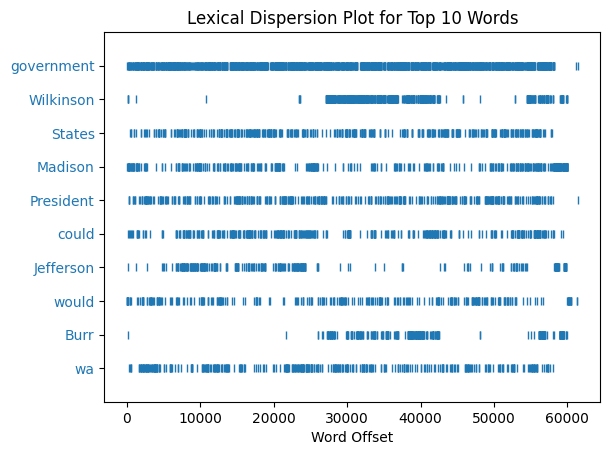

In [298]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [299]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [300]:
long_words

['advertisement',
 'irretrievably',
 'inflexibility',
 'crowninshields',
 'blennerhasset',
 'reconstructed',
 'representation',
 'pennsylvanian',
 'revolutionize',
 'denationalizing',
 'representative',
 'pennsylvanians',
 'provisionally',
 'mortification',
 'strengthening',
 'responsibility',
 'unnecessarily',
 'insubordinate',
 'unintelligible',
 'contradicting',
 'unsatisfactory',
 'embarrassment',
 'congratulated',
 'statesmanship',
 'comprehensible',
 'notwithstanding',
 'disappearance',
 'indispensable',
 'problematical',
 'communicating',
 'disentanglement',
 'unenforceability',
 'experimenting',
 'proportionable',
 'unappropriated',
 'confederation',
 'reinforcement',
 'appropriating',
 'contradiction',
 'complimentary',
 'crowninshield',
 'circumspection',
 'fortification',
 'correspondence',
 'revolutionizing',
 'corresponding',
 'appropriation',
 'international',
 'unconstitutional',
 'congratulating',
 'remodifications',
 'uninterrupted',
 'characteristic',
 'unwillingness'

In [301]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

17

In [302]:
print(big_words)

['administration', 'appropriation', 'blennerhassett', 'communication', 'consideration', 'correspondence', 'crowninshield', 'determination', 'establishment', 'extraordinary', 'massachusetts', 'notwithstanding', 'representative', 'responsibility', 'thenceforward', 'understanding', 'unfortunately']


<Figure size 1200x900 with 0 Axes>

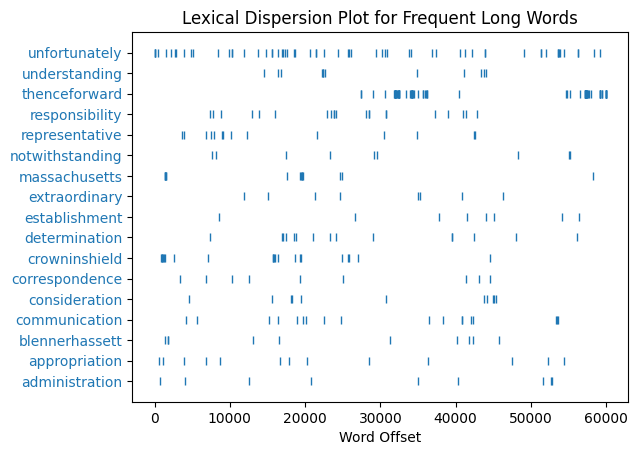

In [303]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [304]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [305]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('of', 'the'), ('to', 'the'), ('in', 'the'), ('the', 'President'), ('on', 'the'), ('to', 'be'), ('that', 'the'), ('and', 'the'), ('United', 'States'), ('with', 'the'), ('the', 'United'), ('for', 'the'), ('Burr', 's'), ('by', 'the'), ('had', 'been'), ('of', 'his'), ('from', 'the'), ('at', 'the'), ('he', 'had'), ('New', 'Orleans'), ('of', 'a'), ('that', 'he'), ('could', 'not'), ('and', 'that'), ('the', 'same'), ('and', 'to'), ('in', 'a'), ('the', 'Spanish'), ('he', 'wa'), ('Jefferson', 's'), ('of', 'this'), ('would', 'be'), ('the', 'British'), ('a', 'the'), ('wa', 'to'), ('such', 'a'), ('have', 'been'), ('wa', 'not'), ('it', 'wa'), ('New', 'York'), ('of', 'Burr'), ('wa', 'a'), ('President', 's'), ('should', 'be'), ('to', 'his'), ('his', 'own'), ('in', 'his'), ('for', 'a'), ('all', 'the'), ('and', 'a'), ('not', 'be'), ('and', 'in'), ('he', 'could'), ('could', 'be'), ('the', 'House'), ('would', 'have'), ('wrote', 'to'), ('a', 'a'), ('to', 'a'), ('with', 'a'), ('did', 'not'), ('wa', 'the')

In [306]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('of', 'the'),
 ('to', 'the'),
 ('in', 'the'),
 ('the', 'President'),
 ('on', 'the')]

In [307]:
len(statistical_bigrams)

5

In [308]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'I')  # Replace 'your_seed_word' with your desired starting word


I have to the world Without expressly recommending manly and most other part it away 

In [309]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('the', 'United', 'States')
('of', 'the', 'United')
('the', 'President', 's')
('in', 'order', 'to')
('in', 'regard', 'to')
('of', 'Burr', 's')
('Annals', 'of', 'Congress')
('Secretary', 'of', 'State')
('could', 'not', 'be')
('the', 'Secretary', 'of')


In [310]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'The', 'only')  # Replace with your desired starting words


The only measure which bore on it word when recourse is had to armament and 

# Lemmmatization, contractions

First let's normalize contractions. So we hope to replace things like "let's" with "let us" and "can't" with "cannot", etc.

In [311]:
!pip install contractions
import contractions

In [312]:
help(contractions)

Help on package contractions:

NAME
    contractions

PACKAGE CONTENTS
    data (package)
    test___init__

FUNCTIONS
    add(key, value)
    
    fix(s, leftovers=True, slang=True)
    
    get_combinations(tokens, joiners)
    
    intersperse(lst, item)
    
    preview(text, flank)
        Return all contractions and their location before fix for manual check. Also provide a viewing window to quickly
        preview the contractions in the text.
        :param text: texture.
        :param flank: int number, control the size of the preview window. The window would be "flank-contraction-flank".
        :return: preview_items, a list includes all matched contractions and their locations.

DATA
    comb = "you'd've"
    contractions_dict = {"'cause": 'because', "'em": 'them', "'tis": 'it i...
    json_open = b'{\n     "\'aight": "alright",\n     "abt": "ab...a": "wa...
    k = 'you’d’ve'
    leftovers_dict = {"'all": '', "'am": '', "'cause": 'because', "'coz": ...
    month = 'decemb

In [313]:
expanded_text = contractions.fix(raw)

In [314]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [315]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming 'expanded_text' is your text after expanding contractions
# expanded_text = "Your expanded text here"

# Tokenize the text
tokens = word_tokenize(expanded_text)

# Lemmatize each word
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_text


'In perfect quiet , disturbed only by rumor of war abroad , spring crept forward to summer , summer ripened to autumn . Peace wa restored with Tripoli ; commerce grew apace ; the revenue rose to $ 14,000,000 ; the Treasury wa near a surfeit ; no sign appeared of check to the immense prosperity which diffused itself through every rivulet in the wilderness , and the President could see no limit to it future increase . In 1804 he had sent out an expedition under Captain Meriwether Lewis to explore the Louisiana purchase along the course of the Missouri River . May 14 , 1804 , Lewis and his party began their journey from St. Louis , and without serious difficulty reached the Mandan town , sixteen hundred and nine mile from the starting point , where , November 1 , 1804 , they went into winter quarter . April 8 , 1805 , Lewis resumed his journey to the westward , sending the report of his wandering to Washington . This report told only of a vast region inhabited by Indian tribe and disturbe

In [316]:
lemmatized_text[30:200]

'nly by rumor of war abroad , spring crept forward to summer , summer ripened to autumn . Peace wa restored with Tripoli ; commerce grew apace ; the revenue rose to $ 14,0'

In [317]:
all_tokens=word_tokenize(lemmatized_text)#.lower())

In [318]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [319]:
print(clean_tokens[0:100])

['In', 'perfect', 'quiet', 'disturbed', 'only', 'by', 'rumor', 'of', 'war', 'abroad', 'spring', 'crept', 'forward', 'to', 'summer', 'summer', 'ripened', 'to', 'autumn', 'Peace', 'wa', 'restored', 'with', 'Tripoli', 'commerce', 'grew', 'apace', 'the', 'revenue', 'rose', 'to', 'the', 'Treasury', 'wa', 'near', 'a', 'surfeit', 'no', 'sign', 'appeared', 'of', 'check', 'to', 'the', 'immense', 'prosperity', 'which', 'diffused', 'itself', 'through', 'every', 'rivulet', 'in', 'the', 'wilderness', 'and', 'the', 'President', 'could', 'see', 'no', 'limit', 'to', 'it', 'future', 'increase', 'In', 'he', 'had', 'sent', 'out', 'an', 'expedition', 'under', 'Captain', 'Meriwether', 'Lewis', 'to', 'explore', 'the', 'Louisiana', 'purchase', 'along', 'the', 'course', 'of', 'the', 'Missouri', 'River', 'May', 'Lewis', 'and', 'his', 'party', 'began', 'their', 'journey', 'from', 'Louis', 'and']


In [320]:
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [321]:
print(All_words[0:100])

['perfect', 'quiet', 'disturbed', 'rumor', 'war', 'abroad', 'spring', 'crept', 'forward', 'summer', 'summer', 'ripened', 'autumn', 'Peace', 'wa', 'restored', 'Tripoli', 'commerce', 'grew', 'apace', 'revenue', 'rose', 'Treasury', 'wa', 'near', 'surfeit', 'sign', 'appeared', 'check', 'immense', 'prosperity', 'diffused', 'every', 'rivulet', 'wilderness', 'President', 'could', 'see', 'limit', 'future', 'increase', 'sent', 'expedition', 'Captain', 'Meriwether', 'Lewis', 'explore', 'Louisiana', 'purchase', 'along', 'course', 'Missouri', 'River', 'May', 'Lewis', 'party', 'began', 'journey', 'Louis', 'without', 'serious', 'difficulty', 'reached', 'Mandan', 'town', 'sixteen', 'hundred', 'nine', 'mile', 'starting', 'point', 'November', 'went', 'winter', 'quarter', 'April', 'Lewis', 'resumed', 'journey', 'westward', 'sending', 'report', 'wandering', 'Washington', 'report', 'told', 'vast', 'region', 'inhabited', 'Indian', 'tribe', 'disturbed', 'restless', 'murderous', 'Sioux', 'served', 'prove', '

In [322]:
All_fd=nltk.FreqDist(All_words)

In [323]:
All_fd

FreqDist({'wa': 1504, 'Burr': 525, 'would': 474, 'could': 439, 'Jefferson': 394, 'President': 381, 'Madison': 275, 'States': 261, 'Wilkinson': 254, 'government': 252, ...})

In [324]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

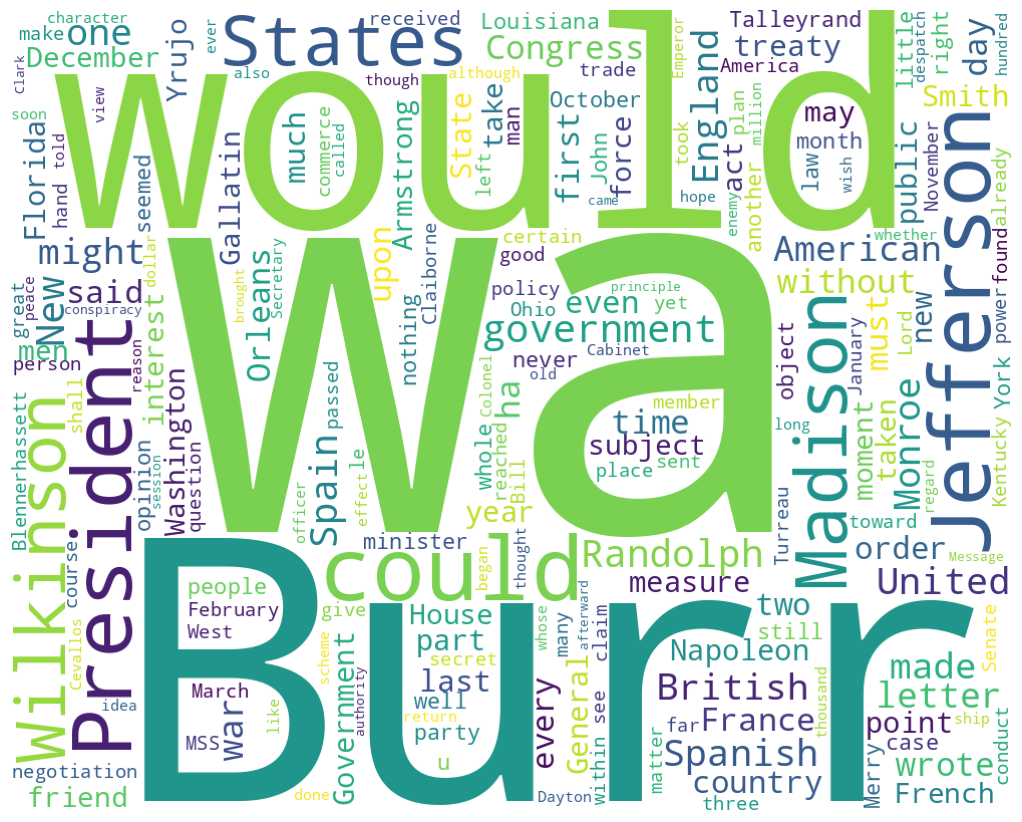

In [325]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [326]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['wa', 'Burr', 'would', 'could', 'Jefferson', 'President', 'Madison', 'States', 'Wilkinson', 'government']


<Figure size 1200x900 with 0 Axes>

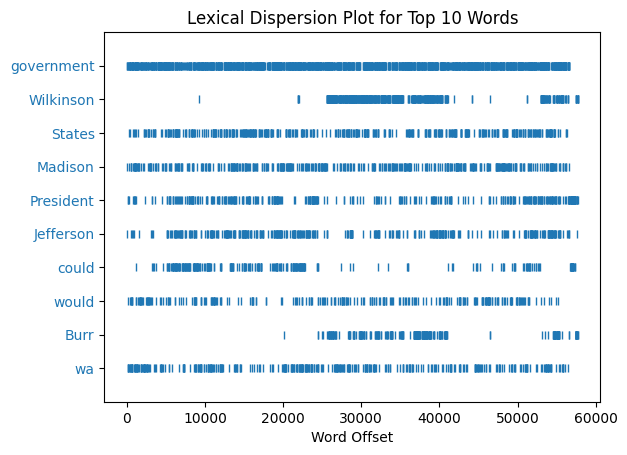

In [327]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()